<a href="https://colab.research.google.com/github/Yashmitha22/Furniture_Website/blob/main/Breast__cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

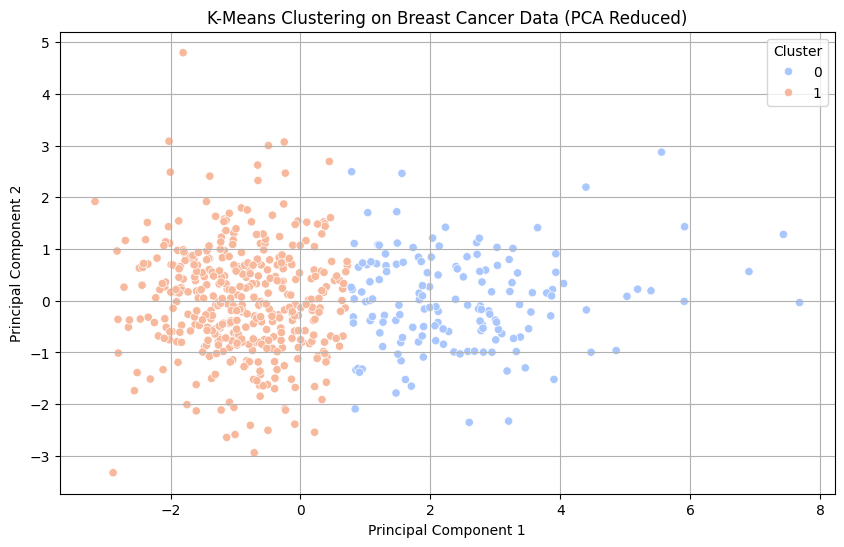

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('Breast_cancer_data.csv')

if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='coolwarm')
plt.title('K-Means Clustering on Breast Cancer Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
